In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_context('talk')
import matplotlib.pyplot as plt
import warnings
from SKL_search import *
warnings.filterwarnings("ignore")

In [56]:
#untie local dependency
import os
cwd = os.getcwd().split('\\')
local_repo_path = '\\'.join(cwd[:-1])
raw_data_path = local_repo_path + r'\data\raw'
processed_data_path = local_repo_path + '\data\processed'
feature_path = local_repo_path + r'\\data\\features'
submissions_path = local_repo_path + r'\\submissions'

In [57]:
sj_feature_train = pd.read_csv(feature_path + r'\\sj_train.csv', index_col=0)
sj_feature_test = pd.read_csv(feature_path + r'\\sj_test.csv', index_col=0)
iq_feature_train = pd.read_csv(feature_path + r'\\iq_train.csv', index_col=0)
iq_feature_test = pd.read_csv(feature_path + r'\\iq_test.csv', index_col=0)

In [58]:
from sklearn.model_selection import train_test_split
X_tr_sj, X_val_sj, Y_tr_sj, Y_val_sj = train_test_split(sj_feature_train.drop('total_cases', axis = 1), sj_feature_train['total_cases'], test_size = 0.05, random_state = 4)
X_tr_iq, X_val_iq, Y_tr_iq, Y_val_iq = train_test_split(iq_feature_train.drop('total_cases', axis = 1), iq_feature_train['total_cases'], test_size = 0.05, random_state = 4)

In [70]:
from sklearn.svm import SVR
from sklearn import linear_model

In [71]:
sub_fname = '\test.csv'

In [72]:
sj_mod, iq_mod = linear_model.HuberRegressor(), linear_model.HuberRegressor()

In [73]:

sj_mod.fit(X_tr_sj, np.log(1 + Y_tr_sj))

sj_preds = sj_mod.predict(sj_feature_test.drop(['city', 'year'], axis = 1))

sj_sub = pd.DataFrame(sj_feature_test[['city', 'year', 'weekofyear']])
sj_sub['total_cases'] = np.exp(sj_preds)-1

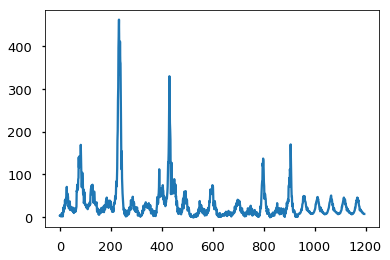

In [74]:
sj_feature_train['total_cases'].append(sj_sub['total_cases']).reset_index()['total_cases'].plot()

In [75]:
iq_mod.fit(X_tr_iq, np.log(1+Y_tr_iq))

iq_preds = iq_mod.predict(iq_feature_test.drop(['city', 'year'], axis = 1))

iq_sub = pd.DataFrame(iq_feature_test[['city', 'year', 'weekofyear']])
iq_sub['total_cases'] = np.exp(iq_preds) -1


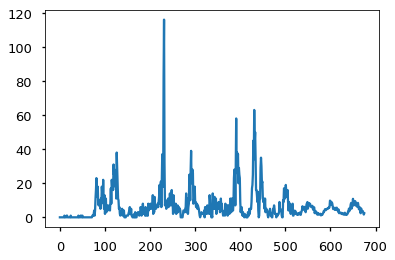

In [76]:
iq_feature_train['total_cases'].append(iq_sub['total_cases']).reset_index()['total_cases'].plot()

In [39]:
sub = sj_sub.append(iq_sub)

In [40]:
sub['total_cases'] = sub['total_cases'].map(lambda x: int(x))

In [41]:
sub.to_csv(submissions_path + sub_fname, index = False)

In [42]:
sub

,city,year,weekofyear,total_cases
0,sj,2008,18,15
1,sj,2008,19,14
2,sj,2008,20,9
3,sj,2008,21,11
4,sj,2008,22,10
5,sj,2008,23,14
6,sj,2008,24,14
7,sj,2008,25,12
8,sj,2008,26,12
9,sj,2008,27,16
